# Sayı Tanıma
Bu notebookta mnist veri seti üzerinden bir sınıflandırma problemi çözeceğiz. Veri seti $0-9$ arasındaki sayıların el ile yazılmasından oluşur. Her sayı $28x28$ boyutunda pikselden oluşur. Veri setinde toplamda $70.000$ görüntüden oluşur, bu çalışma için $42.000$ tanesi eğitim için kalan $28.000$ tanesi de test için ayrılmıştır.

Veri seti Kaggle sayfası. $\to$ [link](https://www.kaggle.com/datasets/dillsunnyb11/digit-recognizer)

In [1]:
# gerekli kütüphaneler
import numpy as np  # sayısal işlemler 
import pandas as pd  # veri manipülasyonu 
import seaborn as sns  # görselleştirme
import matplotlib.pyplot as plt  # görselleştirme

# görsel çıktılardaki uyarı mesajları için
import warnings 
warnings.filterwarnings('ignore')

In [2]:
veri = pd.read_csv('train.csv')

In [3]:
veri.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
veri['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [5]:
veri.shape

(42000, 785)

Veri seti $42.000$ satır ve $785$ sütundan oluşmakta. Label sütunu el yazısı rakamın hangisi olduğunu belirtir. pixel0-pixel783'e kadar giden sütunlar ise sırasıyla her bir pikseldeki yoğunluğu belirtir.

In [6]:
veri.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

Veri setindeki tüm değerler sayısaldır (int64).

### Veri setindeki rakamların dağılımı 

Dağılıma baktığımız zaman veri setinin oldukça dengeli olduğu söylenebilir.

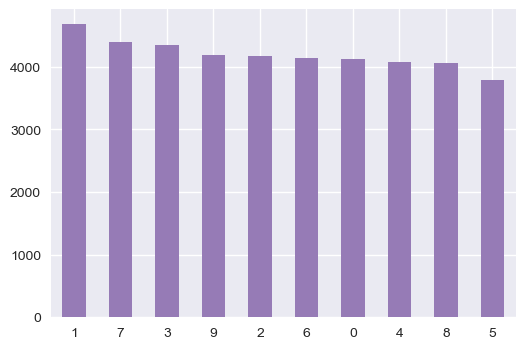

In [7]:
plt.style.use('seaborn')
plt.figure(figsize=(6,4)) 
veri['label'].value_counts().plot(kind='bar', color = '#967bb6')
plt.xticks(rotation=0)
plt.show()

### Veri setindeki sayılara görsel olarak bakalım

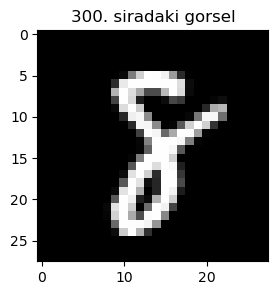

In [8]:
plt.style.use('default')
def ekrana_bas(index):
    rakamlar = veri.iloc[index,1:].values
    rakam_img = rakamlar.reshape(28,28)
    plt.figure(figsize=(3,3))
    plt.imshow(rakam_img, cmap = 'gray')
    baslik = '{}. siradaki gorsel'.format(index)
    plt.title(baslik)
    
ekrana_bas(300)

### Bağımsız değişkenleri ile bağımlı değişkenleri belirleyelim

<b>X = bağımsız değişkenler $\to$ label dışındaki tüm değişkenler</b>

<b>y = bağımlı değişken $\to$ label</b>

In [9]:
X, y = veri.drop(['label'], axis = 1).values, veri['label']

In [10]:
X.shape

(42000, 784)

### Veri setini train ve test olarak bölelim

In [11]:
num_train = 38000
X_train, X_test, y_train, y_test = X[:num_train], X[num_train:], y[:num_train], y[num_train:]

In [12]:
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (38000, 784)
Shape of y_train: (38000,)
Shape of X_test: (4000, 784)
Shape of y_test: (4000,)


$42.000$ gözlemin $38.000$'i train kalan $4.000$'de test için ayrılıyor.

### Accuracy ve Confusion Matrix fonksiyonlarını import edelim  

In [13]:
# modellerin basarisini degerlendirmek icin
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## K Neighbors Classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test,y_pred_knn)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(cm_knn, '\n--------------------------\n', 'KNN Accuracy Score: ', knn_accuracy)

[[427   0   0   0   0   1   2   0   0   0]
 [  0 440   0   0   0   0   1   1   0   0]
 [  4   1 353   1   1   0   0  10   1   1]
 [  1   0   3 405   0   7   0   1   3   1]
 [  0   1   0   0 414   0   2   1   0   4]
 [  0   1   0   2   0 328   1   0   0   2]
 [  2   0   0   0   1   2 395   0   0   0]
 [  0   2   3   1   2   0   0 390   0   3]
 [  1  13   1   3   2   5   2   1 346   5]
 [  3   0   1   0   8   2   0   5   0 380]] 
--------------------------
 KNN Accuracy Score:  0.9695


### Çıktının Görselleştirilmesi

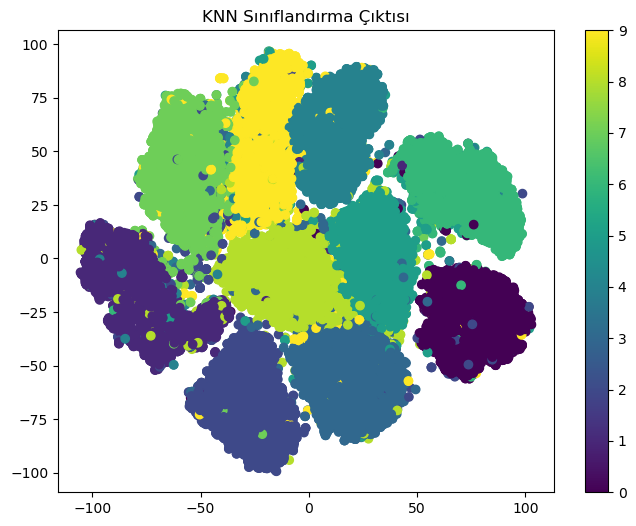

In [34]:
from sklearn.manifold import TSNE # indirgeme icin

# t-SNE ile verileri 2D uzaya indirgeme
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

# KNN model
knn_model = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn_model.fit(X_embedded, y)
y_pred_knn_model = knn_model.predict(X_embedded)

# gorsellestirme
plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_pred_knn_model, cmap='viridis')
plt.title('KNN Sınıflandırma Çıktısı')
plt.colorbar()
plt.show()

## Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train)
y_pred_logr = logr.predict(X_test)
cm_logr = confusion_matrix(y_test,y_pred_logr)
logr_accuracy = accuracy_score(y_test, y_pred_logr)
print(cm_logr, '\n--------------------------\n', 'Logistic Regression Accuracy Score: ', logr_accuracy)

[[416   0   2   1   1   1   4   1   4   0]
 [  0 429   1   2   1   1   1   0   4   3]
 [  4   3 328   7   1   1   5   4  17   2]
 [  1   0  10 386   0  10   3   3   5   3]
 [  3   2   6   1 388   2   4   1   6   9]
 [  6   3   6  11   5 278   3   1  16   5]
 [  3   0   1   0   1   1 393   0   1   0]
 [  1   0   8   1   5   1   0 375   0  10]
 [  3  13   7  10   2  10   4   0 327   3]
 [  2   0   3   7  12   5   0  17   4 349]] 
--------------------------
 Logistic Regression Accuracy Score:  0.91725


## Support Vector Machine

In [17]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
cm_svc = confusion_matrix(y_test,y_pred_svc)
svc_accuracy = accuracy_score(y_test, y_pred_svc)
print(cm_svc, '\n--------------------------\n', 'Support Vector Classifier Accuracy Score: ', svc_accuracy)

[[424   0   0   0   0   0   3   1   2   0]
 [  0 437   0   0   1   1   0   0   2   1]
 [  1   0 365   1   0   0   0   2   2   1]
 [  1   0   4 409   0   3   0   1   1   2]
 [  0   1   1   0 409   0   3   0   2   6]
 [  1   1   0   4   1 319   2   0   4   2]
 [  1   0   0   0   1   0 398   0   0   0]
 [  0   0   4   0   1   1   0 393   1   1]
 [  1   4   2   4   1   1   2   0 364   0]
 [  1   0   1   2   6   0   0   5   2 382]] 
--------------------------
 Support Vector Classifier Accuracy Score:  0.975


## Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
cm_gnb = confusion_matrix(y_test,y_pred_gnb)
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
print(cm_gnb, '\n--------------------------\n', 'Naive Bayes Accuracy Score: ', gnb_accuracy)

[[368   1   2   2   0   0  28   0  21   8]
 [  0 418   1   3   0   2   4   0  10   4]
 [ 29  12  83  40   1   1 102   2  99   3]
 [  9  26   4 165   0   0  27   4 153  33]
 [  5   3   3   4  57   3  52   3  92 200]
 [ 19  11   1  10   0  15  30   0 220  28]
 [  1   4   1   0   0   0 387   0   7   0]
 [  1   2   0   4   3   0   2 150  15 224]
 [  4  69   2   5   0   1  10   1 226  61]
 [  2   7   0   2   4   1   1   4   7 371]] 
--------------------------
 Naive Bayes Accuracy Score:  0.56


Naive Bayes algoritması çok düşük bir sonuç verdi. Bunun sebebi algoritmanın veri setindeki değişkenlerin sürekli ve hedef değişkenin de kategorik olduğu zamanlarda iyi performans vermesidir. Bu veri setinde ise tüm değişkenler kesikli ve int tipinde olduğundan ötürü kötü bir sınıflandırma değeri verdi.

Not: Farklı Naive Bayes çeşitleri (Gaussian, Multinomial, Bernoilli) üzerinde de denemeler yaptığımda gene çok düşük bir accuracy değeri elde ettim. Sonuç olarak bu veri seti için uygun bir algoritma olmadığı görülüyor.

## Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy')
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test,y_pred_dtc)
dtc_accuracy = accuracy_score(y_test, y_pred_dtc)
print(cm_dtc, '\n--------------------------\n', 'Decision Tree Accuracy Score: ', dtc_accuracy)

[[398   0   4   3   3  10   8   1   3   0]
 [  0 419   1   4   1   4   0   2   8   3]
 [  5   4 316  13   4   5   1  13   9   2]
 [  5   4  14 346   5  15   8   6  12   6]
 [  0   2   6   4 359   5  10   8  11  17]
 [  6   3   4  14   5 266  15   3  10   8]
 [  2   2  16   0   7   5 362   1   5   0]
 [  1   1  11   2   2   2   0 373   2   7]
 [  4   8   7  13   3   4   6   1 321  12]
 [  1   1   4   5  12   9   1  12  15 339]] 
--------------------------
 Decision Tree Accuracy Score:  0.87475


## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
cm_rfc = confusion_matrix(y_test,y_pred_rfc)
rfc_accuracy = accuracy_score(y_test, y_pred_rfc)
print(cm_rfc, '\n--------------------------\n', 'Random Forest Accuracy Score: ', rfc_accuracy)

[[422   0   0   0   0   2   3   0   3   0]
 [  0 436   0   1   1   1   0   1   2   0]
 [  6   0 355   2   0   0   1   3   5   0]
 [  0   0   6 401   0   1   2   2   7   2]
 [  1   1   0   0 409   0   3   0   2   6]
 [  1   0   0   3   0 319   2   0   4   5]
 [  3   0   0   0   2   2 393   0   0   0]
 [  0   0   5   0   2   0   0 386   2   6]
 [  0   6   1   1   1   1   1   1 365   2]
 [  2   1   3   5   8   0   0   4   2 374]] 
--------------------------
 Random Forest Accuracy Score:  0.965


## XGBoost

In [21]:
import xgboost as xgb
xgb = xgb.XGBClassifier(objective='multiclass:softmax', num_class=3)
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
cm_xgb = confusion_matrix(y_test,y_pred_xgb)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(cm_xgb, '\n--------------------------\n', 'XGB Accuracy Score: ', xgb_accuracy)

[[424   0   0   1   1   0   2   0   2   0]
 [  1 436   0   2   0   0   1   0   2   0]
 [  2   0 359   4   0   0   1   1   3   2]
 [  1   1   2 410   0   1   0   1   2   3]
 [  1   1   0   0 411   0   1   0   1   7]
 [  1   1   1   2   1 319   1   0   6   2]
 [  1   0   0   0   2   1 396   0   0   0]
 [  0   0   5   0   0   0   0 392   1   3]
 [  0   5   1   3   0   0   2   1 366   1]
 [  0   0   1   2   5   0   0   3   3 385]] 
--------------------------
 XGB Accuracy Score:  0.9745


## Neural Network

In [22]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

y_train = to_categorical(y_train)

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, epochs=300, validation_split=0.2, verbose=0, callbacks=[early_stopping])

In [23]:
y_test = to_categorical(y_test)
model.evaluate(X_test, y_test)

125/125 [==============================] - 0s 758us/step - loss: 0.2146 - accuracy: 0.9395


[0.21456848084926605, 0.9394999742507935]

#### Accuracy değeri 93 geldi, diğer denedğimiz algoritmalara göre düşük bir performans verdi. Tabii ki daha iyi bir model kurulursa değer yükselebilir.

### Accuracy değerinin epoch başına ilerleyişinin görselleştirilmesi

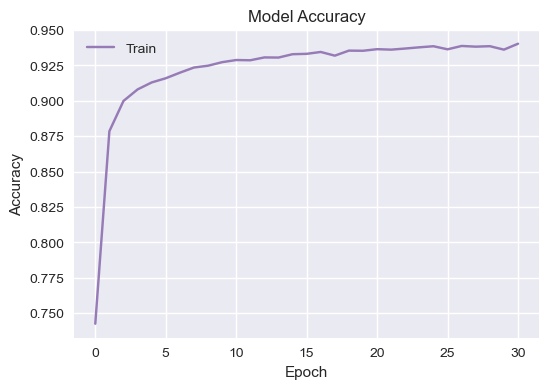

In [24]:
plt.style.use('seaborn')
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], color = '#967bb6')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

### Test verisi üzerinden aldığımız görselleri eğittiğimiz modellere vererek test edelim

In [25]:
test = pd.read_csv('test.csv')

In [26]:
plt.style.use('default')
def test_img(index):
    rakamlar = test.iloc[index].values
    rakam_img = rakamlar.reshape(28,28)
    plt.figure(figsize=(3,3))
    plt.imshow(rakam_img, cmap = 'gray')
    baslik = '{}. siradaki gorsel'.format(index)
    plt.title(baslik)

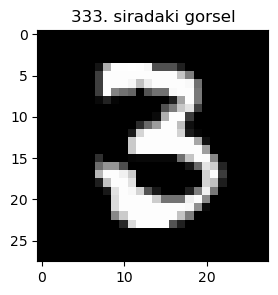

In [27]:
test_img(333)

In [32]:
test_knn = knn.predict(test)
test_logr = logr.predict(test)
test_svc = svc.predict(test)
test_gnb = gnb.predict(test)
test_dtc = dtc.predict(test)
test_rfc = rfc.predict(test)
test_xgb = xgb.predict(test)

In [33]:
print(test_knn[333])
print(test_logr[333])
print(test_svc[333])
print(test_gnb[333])
print(test_dtc[333])
print(test_rfc[333])
print(test_xgb[333])

3
2
3
6
3
3
3


#### Logistic Regression ve Naive Bayes algoritmaları doğru sonucu veremedi.

<b>XGBoost ve Support Vector Machine algoritmaları bu veri setinde başarılı sonuçlar verdiğini söyleyebiliriz.</b>

<b>NOT: Veri setine PCA (Principal Component Analysis) uyguladıktan sonra CNN (Convolutional Neural Network) yapılırsa accuracy değerinin %98'lere kadar geldiği çalışmalar mevcut, denenebilir.</b>